# Kartik Kandwal

# Task 3-EDA on Global Terrorism

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA? 

In [1]:
import math
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='cp1252')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Taking useful data and rename the column in proper way

In [8]:
terror=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
terror.shape

(181691, 18)

In [11]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [12]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [13]:
#There were too many 0 as Day value too. We changed 0 values with random integers between 1-31.  So we did not miss any value. 
terror['Day'] = terror['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
terror['Month'] = terror['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)

In [14]:
a = terror.groupby(by='Day').agg(['count'])
b = a['Year']
b.columns = ['count']
b = b.reset_index()
b

,Day,count
0,1,6374
1,2,5983
2,3,6037
3,4,6185
4,5,5869
5,6,5804
6,7,6035
7,8,5882
8,9,6085
9,10,6104


In [15]:
#finding missing value percentage in data
def missing_values_(terror): 
    missing_value = terror.isnull().sum()
    missing_value_percent = 100 * terror.isnull().sum()/len(terror)
    missing_values_ = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_values_last = missing_values_.rename(
    columns = {0 : 'Missing Values', 1 : 'missing_value_percent% '})
    return missing_values_last
missing_values_(terror)

,Missing Values,missing_value_percent%
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
state,421,0.231712
Region,0,0.000000
city,434,0.238867
latitude,4556,2.507554
longitude,4557,2.508104
AttackType,0,0.000000


In [16]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [17]:
terror['state'].value_counts

<bound method IndexOpsMixin.value_counts of 0                     NaN
1                 Federal
2                  Tarlac
3                  Attica
4                 Fukouka
               ...       
181686    Middle Shebelle
181687           Lattakia
181688        Maguindanao
181689            Manipur
181690        Maguindanao
Name: state, Length: 181691, dtype: object>

In [18]:
terror['Motive'].fillna(value='nothing', inplace=True) #I did not want to miss any value. So I replaced them with a value that has the same type.
terror['Summary'].fillna(value='nothing', inplace=True)
terror['city'].fillna(value='Unknown', inplace=True)
terror['Target'].fillna(value='Unknown', inplace=True)
terror["Killed"].fillna(terror["Killed"].mean(), inplace=True)
terror["Wounded"].fillna(terror["Wounded"].mean(), inplace=True)
terror["latitude"].fillna(terror["latitude"].mean(), inplace=True)
terror["longitude"].fillna(terror["longitude"].mean(), inplace=True)
terror['state'].fillna(value='nan', inplace=True)#I did not want to miss any value and there are many name in state so i mentioned nan 


In [19]:
terror.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [20]:
#checking data
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) 
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


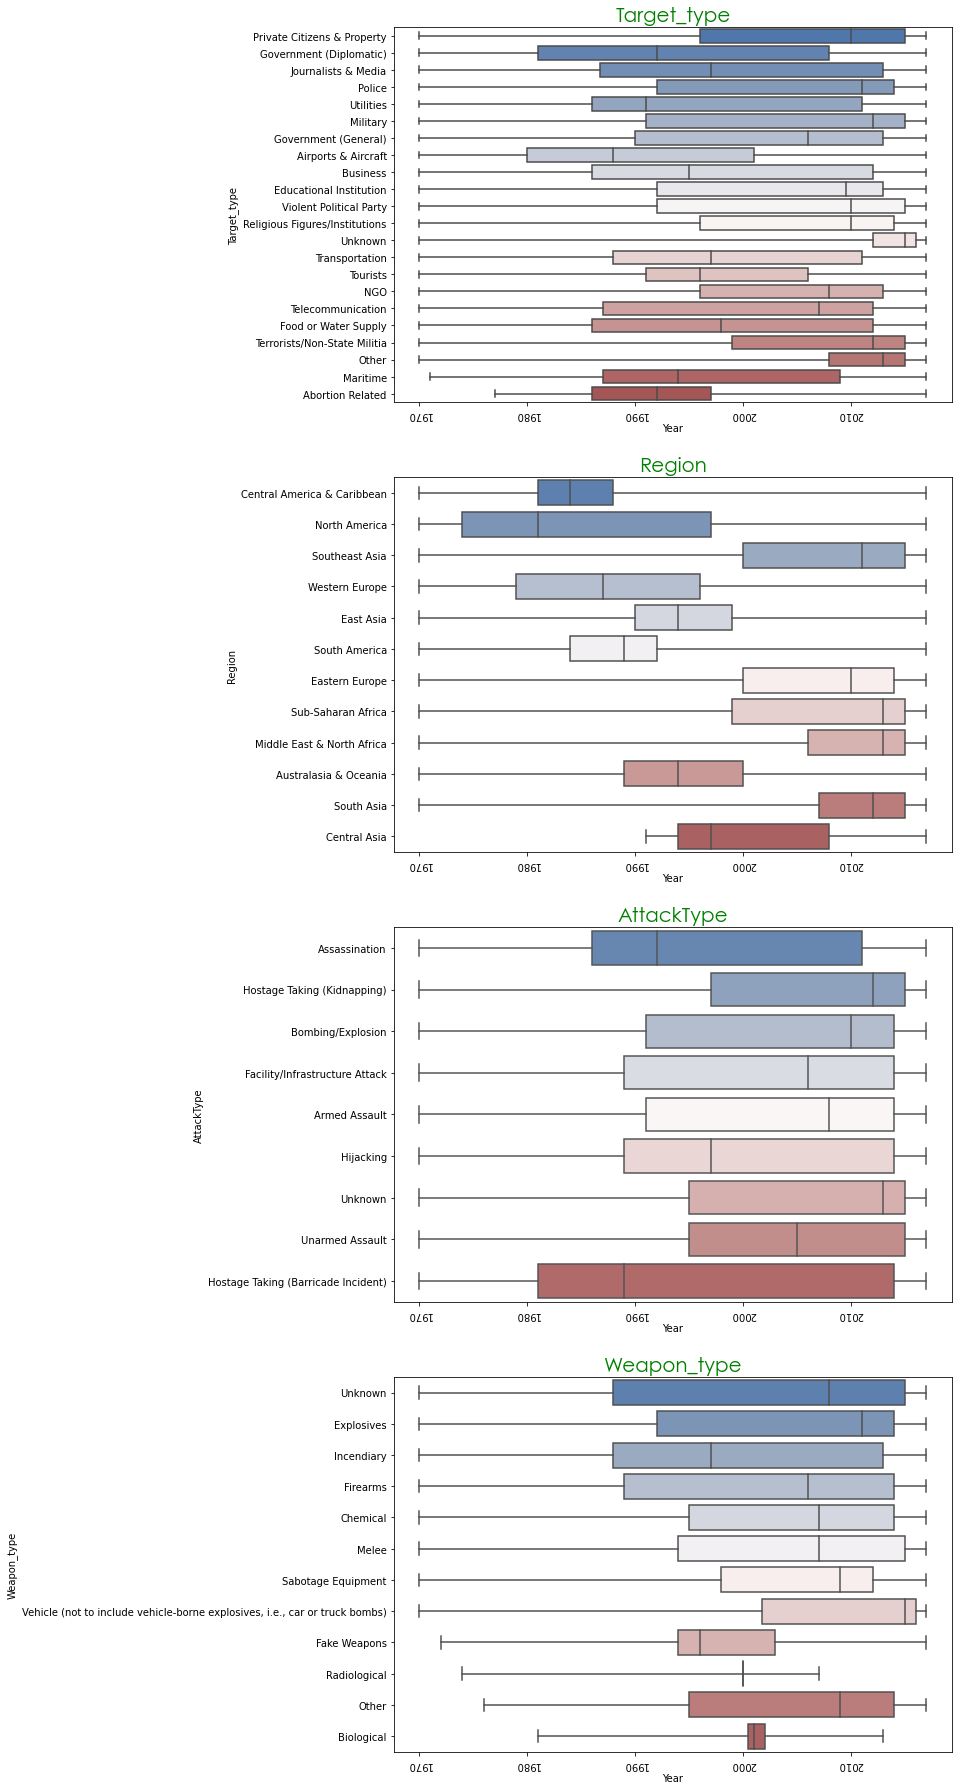

In [21]:
#boxplots
title_style = {'family': 'Century Gothic', 'color': 'green', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 25}
values = {'AttackType':1,'Target_type':2,  'Region':3,   'AttackType':4,   'Weapon_type':5 }
plt.figure(figsize=(10,40))

for value, i in values.items():
    plt.subplot(5,1,i)
    sns.boxplot(x="Year", y=value, data=terror,
            whis=[0, 100], palette="vlag")
    plt.xticks(rotation = 180)
    plt.title(value ,fontdict = title_style)

plt.show()

Text(0.5, 1.0, 'Correlation Matrix (Data)')

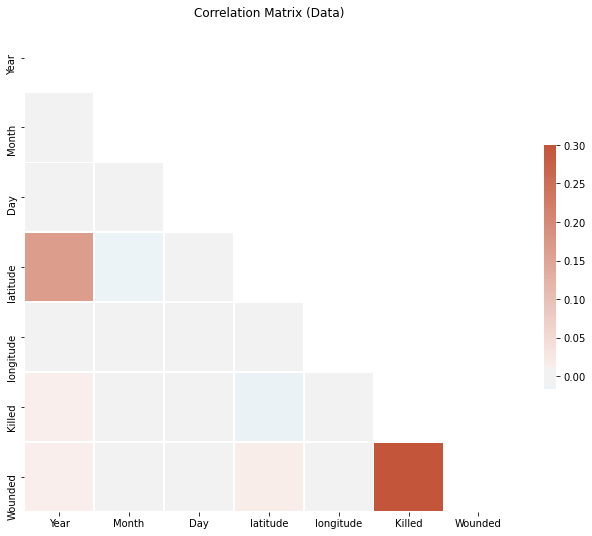

In [22]:
#correlation
a = terror.corr()
mask = np.triu(np.ones_like(a, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(a, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Data)")

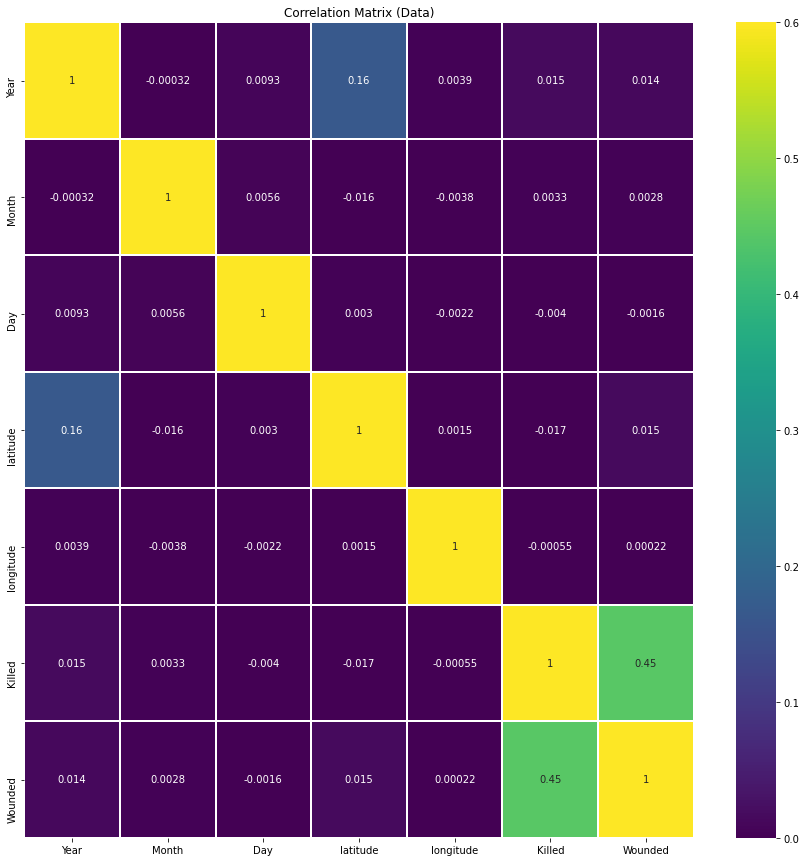

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(a, annot=True, annot_kws={"size": 10}, linewidths=1, vmin=0, vmax=0.6, cmap='viridis')
plt.title("Correlation Matrix (Data)")
plt.show() 

Number of Terrorist Activities each Year

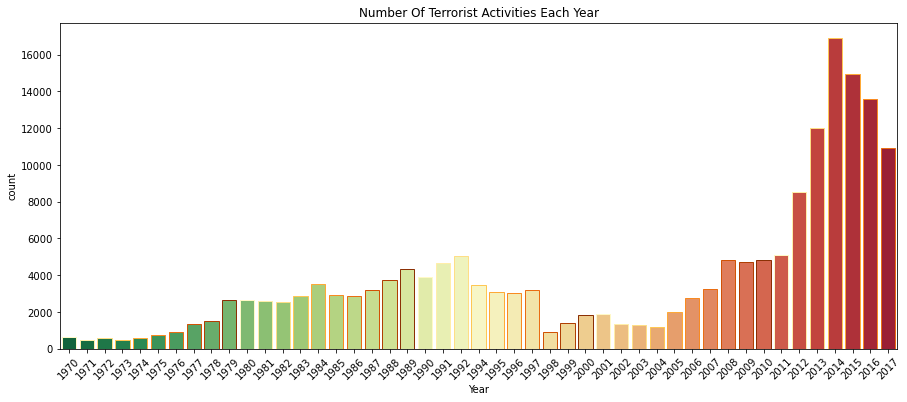

In [24]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Terrorist Activities by Region in each Year through Area Plot

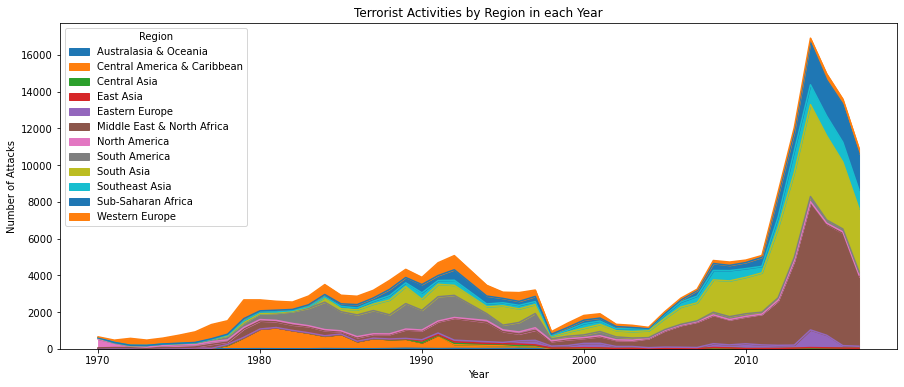

In [25]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [26]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
terror['casualities'] = terror['Killed'] + terror['Wounded']
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

Top Countries affected by Terror Attacks

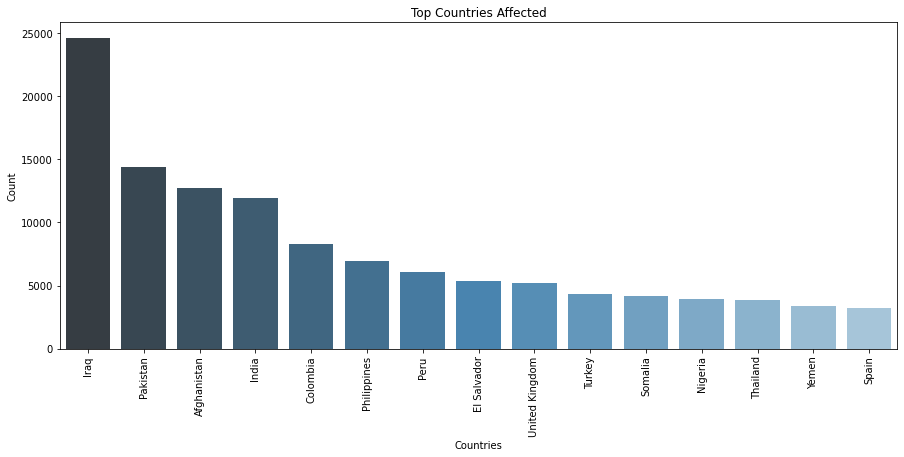

In [27]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

weapon used by different regions

In [28]:
weapon_cross = pd.crosstab(terror["Weapon_type"], terror["Region"])
weapon_cross

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Weapon_type,,,,,,,,,,,,
Biological,0,0,0,2,0,1,24,1,2,0,3,2
Chemical,11,2,2,17,12,73,26,26,83,11,12,46
Explosives,80,3149,254,333,3089,32283,1557,9098,22568,5039,6319,8657
Fake Weapons,0,0,1,4,4,6,5,3,3,0,1,6
Firearms,74,5679,232,41,1461,11877,682,6525,15169,5634,7499,3651
Incendiary,74,435,15,252,186,1181,897,1077,2285,837,840,3056
Melee,10,65,14,82,90,1227,74,131,998,147,478,339
Other,1,0,0,3,4,23,18,6,16,4,19,20
Radiological,0,0,0,10,0,0,1,0,1,0,0,2


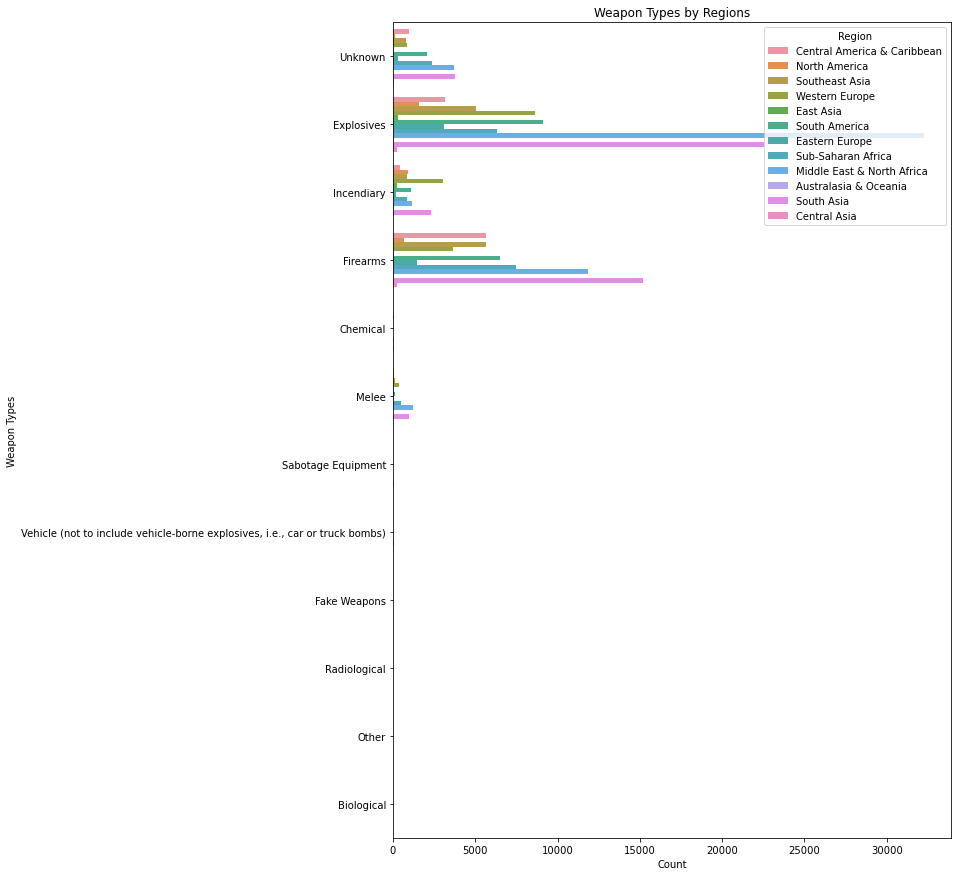

In [29]:
plt.figure(figsize=(10,15))
sns.countplot(y="Weapon_type", hue="Region", data=terror)
plt.title("Weapon Types by Regions")
plt.ylabel("Weapon Types")
plt.xlabel("Count")
plt.show()

How many people loose their lives every year

Terrorist Attacks of a Particular year and their Locations
Let's look at the terrorist acts in the world over a certain year

In [30]:
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 1970

In [31]:
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [32]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

In [33]:
k_by_year_1 = terror.groupby('Year')['Killed'].sum().reset_index()
k_by_year_1 = k_by_year_1.set_index('Year')
k_by_year_1.columns = ['Killed']
k_by_year_1 = k_by_year_1.reset_index()
Total = k_by_year_1['Killed'].sum()
k_by_year_1['Ratio'] = k_by_year_1['Killed']/ Total
k_by_year_1 #It

,Year,Killed,Ratio
0,1970,274.937437,0.000630
1,1971,326.809427,0.000748
2,1972,671.743981,0.001538
3,1973,487.760343,0.001117
4,1974,678.389793,0.001554
5,1975,984.700662,0.002255
6,1976,935.956681,0.002143
7,1977,768.425399,0.001760
8,1978,1826.700662,0.004183
9,1979,3073.325281,0.007038


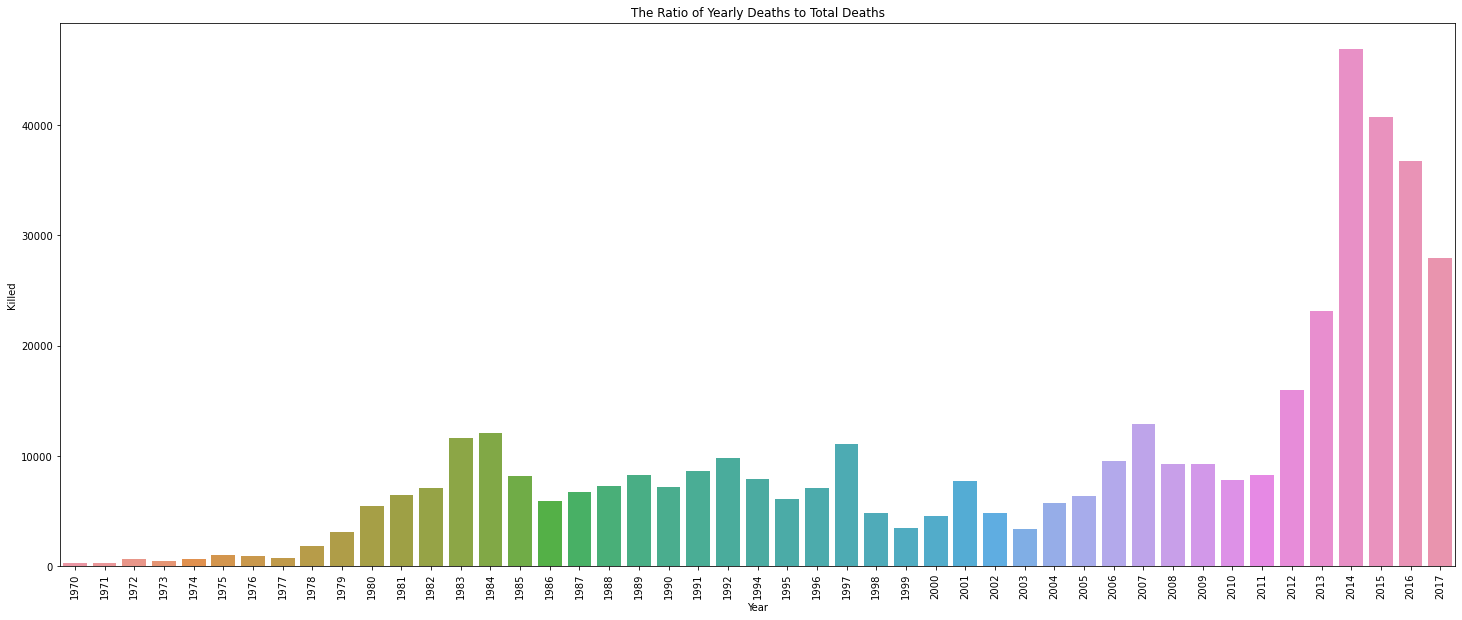

In [34]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Year', y = 'Killed', data = k_by_year_1)
plt.title("The Ratio of Yearly Deaths to Total Deaths")
plt.xticks(rotation=90)
plt.show() #but it works right. <3

The Ratio Between Attacks and Deaths

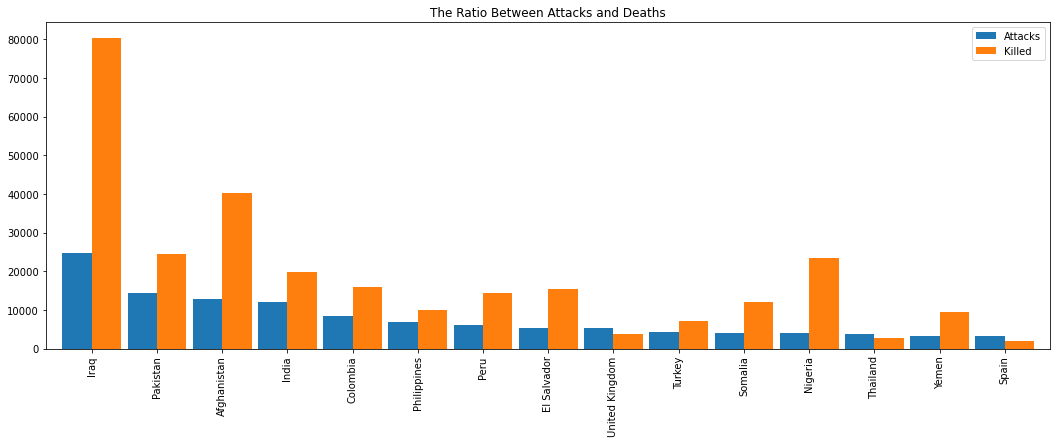

In [35]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.title("The Ratio Between Attacks and Deaths")
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show() #actually I saw this from another notebook and I liked it. I will use this to the show you something different.

In [36]:
general_sum = terror.groupby(by='Region').sum()
g = general_sum['Killed']
g.columns = ['sum']
g = g.reset_index()
g 

,Region,Killed
0,Australasia & Oceania,164.419634
1,Central America & Caribbean,34288.398277
2,Central Asia,1009.613089
3,East Asia,1245.727620
4,Eastern Europe,7813.943202
5,Middle East & North Africa,143104.637935
6,North America,5139.504324
7,South America,32867.271283
8,South Asia,103570.866144
9,Southeast Asia,16300.303154


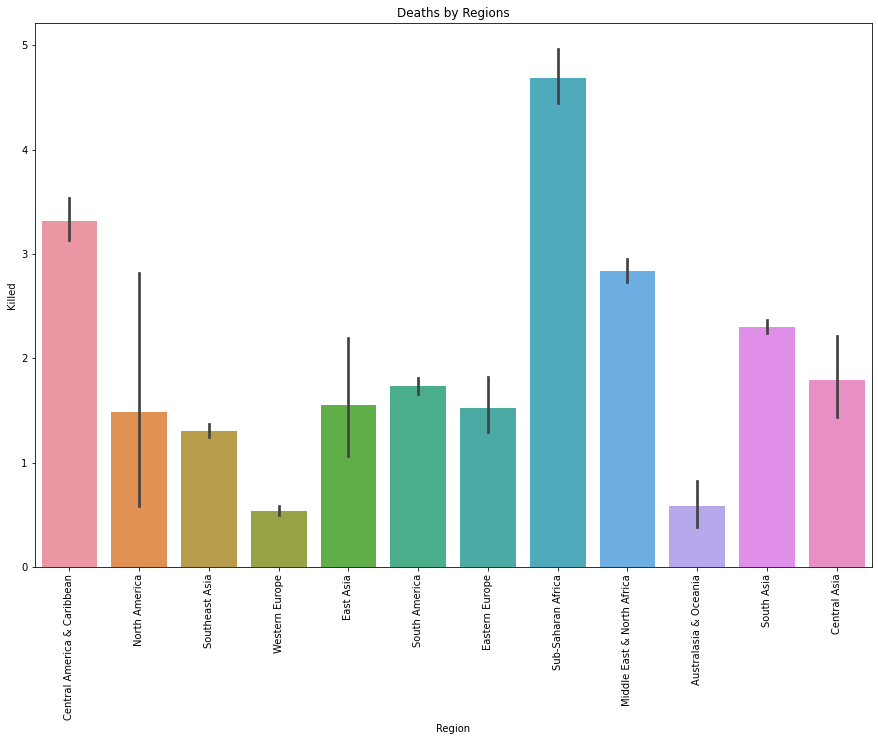

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Region', y = 'Killed', data = terror)
plt.xticks(rotation = 90)
plt.title('Deaths by Regions')
plt.show()

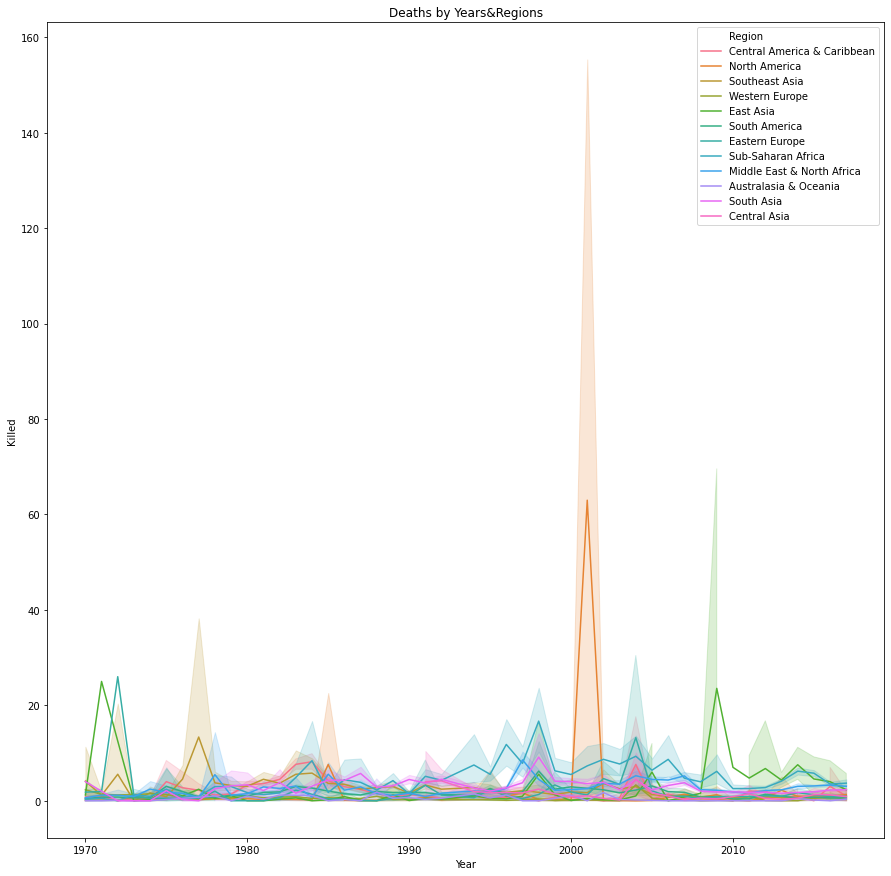

In [38]:
plt.figure(figsize=(15, 15))
sns.lineplot(x = 'Year', y = 'Killed', data = terror, hue = 'Region')
plt.title('Deaths by Years&Regions')
plt.show()

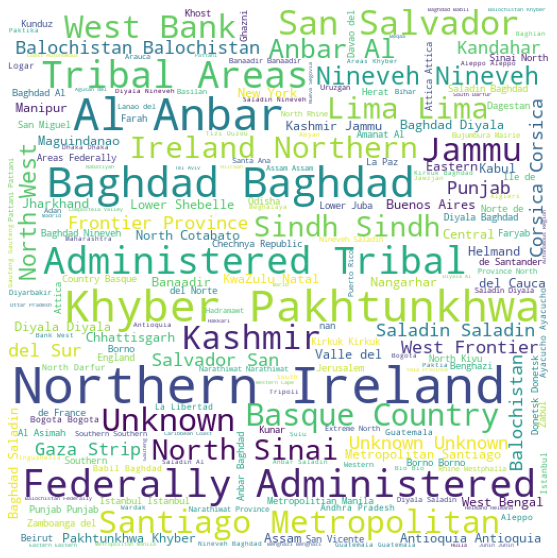

In [39]:
from wordcloud import WordCloud
from scipy import signal
cities = terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 512).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Data Shows

● Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences.

● The Middle East and North Africa are seen to be the places of serious terrorist attacks
 
● Country with the most attacks: Iraq

● City with the most attacks: Baghdad

● Region with the most attacks: Middle East & North Africa

● Year with the most attacks: 2014

● Month with the most attacks: 5

● Group with the most attacks: Taliban

● Most Attack Types: Bombing/Explosion
